# Relatório EP02 - MAC0209

** Grupo Rajada ** <br>
Kaique Komata ---- NUSP: 10297741      <br>
Lucas Civile  -------- NUSP: 7083142   <br>
Ricardo Kojo  ------- NUSP: 10295429   <br>
Victor Hugo   -------- NUSP: 10297720  <br>
Yurick Honda  ------ NUSP: 10258984

## Introdução

<p style='text-align: justify;'>Para o segundo exercício programa houve a execução e análise de três experimentos diferentes visando o estudo de movimentos bidimensionais. Assim como no primeiro exercício programa, foi feita a coleta de dados dos experimentos para uma simulação dos fenômenos físicos e possível comparação de dados teóricos com dados experimentais. <br></p>
<p style='text-align: justify;'>A descida na rampa, apesar de um fenômeno muito presente no nosso cotidiano, é capaz de abranger diversos estudos, principalmente em relação à influência da inclinação da rampa no movimento de descida da rampa.<br></p>
<p style='text-align: justify;'>O movimento circular uniforme possui uma base teórica que por certas vezes, não se torna tão intuitiva, gerando confusão, seja por erros de notação ou falta de conhecimentos teóricos, porém a simplicidade do movimento auxilia em seu estudo. <br></p>
<p style='text-align: justify;'>O lançamento de projétil é um movimento parte vertical e parte horizontal que depende do ângulo em relação a um referencial, da força aplicada no lançamento e da força da gravidade. É um fenômeno que pode ser reproduzido facilmente mas que gera muitos estudos.<br></p>

## <i>Physics ToolBox Sensor</i>

<p style='text-align: justify;'>Assim como requisito para a execução do experimento e melhor análise dos dados experimentais, foi utilizada a ferramenta <i>Physics ToolBox Sensor</i>. Para cada experimento, fez-se uso do sensor que mais correspondia ao movimento descrito no experimento:<br></p>
* Descida na rampa: acelerômetro
* Movimento circular uniforme: giroscópio
* Lançamento de projétil: acelerômetro
<br><br>
<div style='display: flex; flex-direction: row; justify-content: center; align-items: center;'>
    <img style='width: 360px; height: 640px;' src="Experimental Data/PhysicsToolbox/sensorScreenshot2.jpg">
    <img style='width: 360px; height: 640px;' src="Experimental Data/PhysicsToolbox/sensorScreenshot3.jpg">
</div>

## Descida na rampa

### Procedimento experimental

<p style='text-align: justify;'>O experimento foi realizado em uma das rampas da Biblioteca Brasiliana Guita e José Mindlin, onde foi utilizada 15 metros de extensão da mesma. A rampa foi seccionada a cada 5 metros, assim houve marcas nas posições de 5, 10 e 15 metros.<br></p>
<p style='text-align: justify;'>O corpo que realizou a descida da rampa foi um carrinho, como aqueles de controle remoto, com um celular em cima dele, colado com fita adesiva.<br></p>
<p style='text-align: justify;'>Assim, durante a execução do experimento, 3 pessoas ficaram posicionadas nas marcas, como os sensores, e marcaram os tempos correspondentes a cada descida na rampa.<br></p>

### Algoritmos de análises e auxiliares

Importando bibliotecas necessárias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin, radians

Plotando gráficos do acelerômetro do PhysicsToolbox

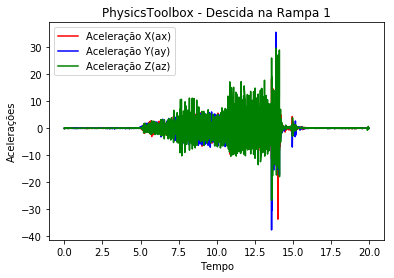

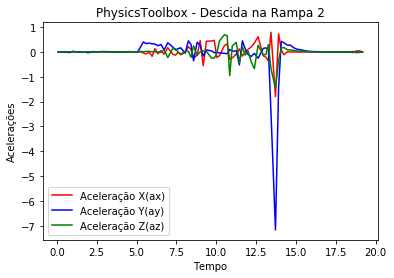

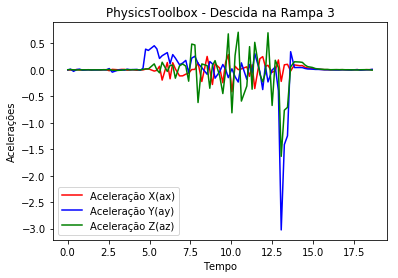

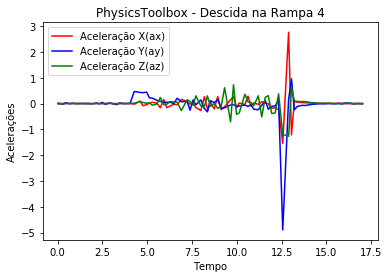

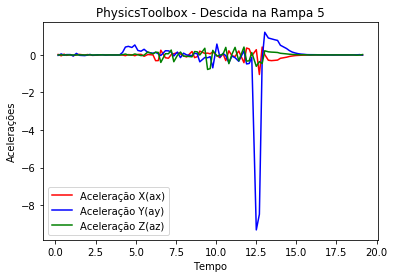

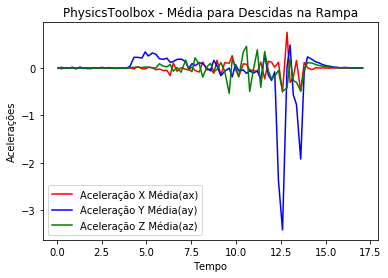

In [43]:
descida_rampa_files = [
    './Experimental Data/PhysicsToolbox/DescidaRampa1.csv',
    './Experimental Data/PhysicsToolbox/DescidaRampa2.csv',
    './Experimental Data/PhysicsToolbox/DescidaRampa3.csv',
    './Experimental Data/PhysicsToolbox/DescidaRampa4.csv',
    './Experimental Data/PhysicsToolbox/DescidaRampa5.csv',
]

# guarda todos os ax, ay e az de cada experimento
ax = []
ay = []
az = []
time = []

# substitui vírgulas por pontos para cada dado do PhysicsToolbox e transforma em float
def format_to_float(arr):
    return [float(s.replace(',', '.')) for s in arr]

def plot_physics_toolbox(file_list):
    for i in range(len(file_list)):
        data = pd.read_csv(descida_rampa_files[i], delimiter=';')
        time.append(format_to_float(data['time'].tolist()))
        ax.append(format_to_float(data['ax'].tolist()))
        ay.append(format_to_float(data['ay'].tolist()))
        az.append(format_to_float(data['az'].tolist()))

        plt.plot(time[i], ax[i], color='red')
        plt.plot(time[i], ay[i], color='blue')
        plt.plot(time[i], az[i], color='green')
        plt.title("PhysicsToolbox - Descida na Rampa %s" % (i+1))
        plt.legend(["Aceleração X(ax)", "Aceleração Y(ay)", "Aceleração Z(az)"])
        plt.xlabel("Tempo")
        plt.ylabel("Acelerações")
        plt.show()

# média x, y, z, time
avg = [[], [], [], []]

# retorna o menor tamanho de todos os vetores de aceleração
def min_length():
    lengths = []
    for i in range(len(descida_rampa_files)):
        lengths.append(len(ax[i]))

    return min(lengths)

def plot_average():
    min_l = min_length()
    
    # percorre as listas de acelerações e faz a média elemento a elemento
    # ignora o primeiro gráfico pois ele possui uma quantidade de dados muito maior
    for i in range(min_l):
        avg[0].append((ax[1][i]+ax[2][i]+ax[3][i]+ax[4][i])/4)
        avg[1].append((ay[1][i]+ay[2][i]+ay[3][i]+ay[4][i])/4)
        avg[2].append((az[1][i]+az[2][i]+az[3][i]+az[4][i])/4)
        avg[3].append((time[1][i]+time[2][i]+time[3][i]+time[4][i])/4)
                      
    plt.plot(avg[3], avg[0], color='red')
    plt.plot(avg[3], avg[1], color='blue')
    plt.plot(avg[3], avg[2], color='green')
    plt.title("PhysicsToolbox - Média para Descidas na Rampa")
    plt.legend(["Aceleração X Média(ax)", "Aceleração Y Média(ay)", "Aceleração Z Média(az)"])
    plt.xlabel("Tempo")
    plt.ylabel("Acelerações")
    plt.show()

    

plot_physics_toolbox(descida_rampa_files)
plot_average()

Funções auxiliares que de fato representam a modelagem do movimento

In [47]:
dataset = pd.read_csv('./Experimental Data/InclinedPlane.csv')

s = [5, 10, 15]
time_plot = [i for i in range(20)]

G = 9.8
Theta = radians(3)
cheat = [0]

In [52]:
# velocity
def vel(dt):
    return ac()*dt

# acceleration
def ac(C = -0.4):
    return (G*sin(Theta) + (C))

def sT (t):
    return (vel(t)*t/2)

In [53]:
# calculates average velocity and acceleration, 
# print it to StdOut and plot graphs for Uniformly Accelerated Motion
def calc_plot(dataset, coord_x, coord_y, plot_color):
    subdataset = dataset.iloc[coord_x, coord_y[0]:coord_y[1]]
    timeline = [float(i) for i in subdataset]
    delta_t = np.sum(timeline)
    velocity = vel(delta_t)
    acceleration = ac()
    
    cheat[0] = acceleration
    print(("Aceleration: %s m/s^2") % (acceleration))

    Y = s
    X = timeline
    for index, value in enumerate(X):
        if (index == 0):
            continue
        else:
            X[index] = X[index-1] + value
        
    plt.plot(X, Y, '.', color=plot_color)
    
    positions_plot = [sT(i) for i in range(20)]
    plt.plot(time_plot, positions_plot, color=plot_color)
    
def plot_vel(xlabel="Tempo (s)", ylabel="Velocidade (m/s)"):
    velocity_plot = [cheat[0] * t for t in range(20)]
    plt.plot(time_plot, velocity_plot, color='purple')
    plt.title("Velocidade")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [54]:
def setup_and_save_plot(title, xlabel="Tempo (s)", ylabel="Espaço (m)"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.clf()

Aceleration: 0.1128923711808496 m/s^2


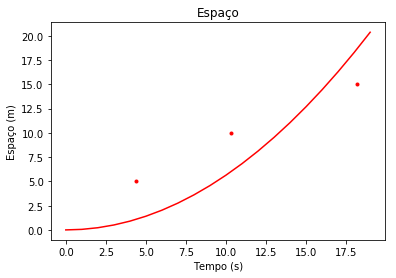

Aceleration: 0.1128923711808496 m/s^2


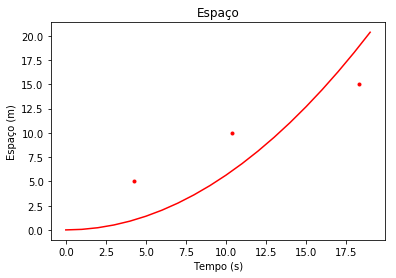

Aceleration: 0.1128923711808496 m/s^2


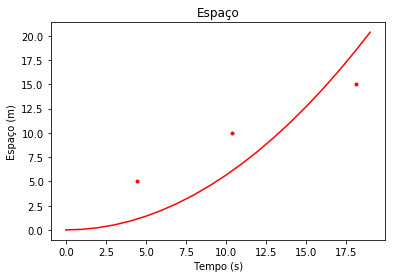

Aceleration: 0.1128923711808496 m/s^2


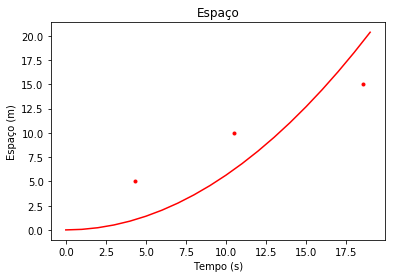

Aceleration: 0.1128923711808496 m/s^2


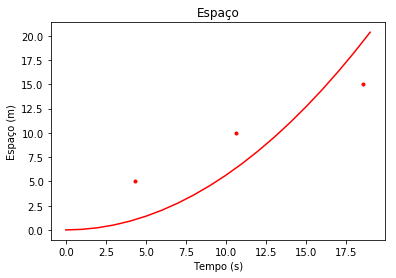

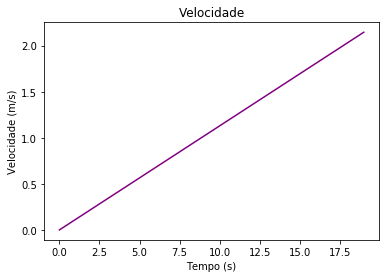

In [55]:
for i in range(5):
    calc_plot(dataset, i+1, [1, 4], 'red')
    setup_and_save_plot("Espaço")
plot_vel()

### Dados

<p style='text-align: justify;'>Os dados coletados durante a execução do experimento apresentam-se como segue abaixo. As cinco descidas realizadas estão marcadas pelo número. Como foram feitas três marcações, então há as faixas de deslocamento: 0m-5m, 5m-10 e 10m-15m.<br></p>
<p style='text-align: justify;'>Vale ressaltar, que, na tabela, os tempos são dados em segundos.<br></p>

|                  |      |      |      | 
|------------------|------|------|------| 
|              Descida na Rampa         | 
|                  | 5m   | 10m  | 15m  | 
| Descida 1        | 4.36 | 5.98 | 7.86 | 
| Descida 2        | 4.24 | 6.13 | 7.95 | 
| Descida 3        | 4.43 | 5.97 | 7.74 | 
| Descida 4        | 4.29 | 6.22 | 8.05 | 
| Descida 5        | 4.3  | 6.32 | 7.92 | 

### Análise

<p style='text-align: justify;'>Com a execução do script percebe-se que o experimento ocorreu como esperado, ou seja, os dados captados durante o experimento se aproximam dos teóricos, gerados pela simulação.</p>
<p style='text-align: justify;'>Em todos os gráficos é possível observar que os pontos, que se referem aos dados do experimento, seguem o mesmo padrão da curva referente aos dados teóricos. Existe uma diferença entre o posicionamento dos pontos em relação à curva que se dá pelo fato da diferença entre os fatores teóricos com os do experimento. Podemos citar a dificuldade de medir exatamente o ângulo da rampa onde o experimento foi realizado, o que acaba proporcionando diferenças nos cálculos, e a não regularidade do piso da rampa, que pode ter causado ruídos aos dados coletados. Além disso, é possível citar a semelhança entre todos os gráficos gerados, o que nos permite concluir que conseguimos reproduzir o experimento todas as vezes de maneira bem parecida.</p>

### Interpretação

<p style='text-align: justify;'>Durante a descida de um corpo na rampa, há forças que podem ser divididas em duas componentes: horizontal e vertical. O grande ponto nesse tipo de movimento é a diferença de direção entre a força peso e a força normal atuando sobre o corpo, o que levará a diferenças vetoriais nas acelerações que descrevem tais forças.<br></p>
<img align="center" src="Images/plano-inclinado.GIF" width="450" height="450">
<p style='text-align: justify;'>A análise feita para tal movimento é descrita pela imagem acima. Os eixos x e y não são estabelecidos como normalmente, pois para facilitar os cálculos, o eixo x é definido paralelo ao plano da rampa e o eixo y definido como perpendicular ao plano da mesma.<br></p>
<p style='text-align: justify;'>Assim, em y, tem-se que:
<br>
$$F_{ry} = N - P_{y}$$
<br>
Como na descida da rampa não há deslocamento do corpo na direção estabelecida como eixo y. Pode-se afirmar que a força resultante do corpo em y, $F_{ry}$, é igual a zero, assim tem-se que:
<br>
$$0 = N - P_{y} \Rightarrow N = P \Rightarrow N = m.g.cos\theta$$
</p>
<p style='text-align: justify;'>Da mesma forma, faz-se a análise no eixo x, pela imagem:
<br>
$$F_{rx} = P_{x}$$
<br>
Basicamente, a força resultante do corpo na direção do eixo x, $F_{rx}$, corresponde apenas à componente da força peso no eixo x. Porém, como há movimento nessa direção, então não pode-se afirmar que a força resultante na direção x é zero:
<br>
$$F_{rx} = P_{x} \Rightarrow F_{rx} = P.sen\theta \Rightarrow F_{rx} = m.g.sen\theta$$
<br>
$$m.a = m.g.sen\theta \Rightarrow a = g.sen\theta$$
Dessa forma, torna-se claro que a aceleração é constante no tempo, ou seja, sua definição independe no tempo na descida da rampa. Por meio, da aceleração encontrada acima, é possível encontrar a velocidade, bem como a posição instantânea do corpo durante o movimento:
$$v(t) = \int a.dt = \int g.sen\theta.dt = g.sen\theta\int 1.dt = g.sen\theta.t + c$$
$$x(t) = \int g.sen\theta.t.dt = g.sen\theta\int t.dt = g.sen\theta.\frac{t^2}{2} + c$$
Com as equações de velocidade e posição instantânea e sabendo a aceleração, então pode-se aplicar o método de Euler e Euler-Cromer para simular o movimento a partir dos dados coletados.
</p>

## Movimento circular uniforme (MCU)

### Procedimento experimental

<p style='text-align: justify;'>A realização do experimento se deu próximo à Praça do Relógio. O primeiro passo foi fixar o centro da circunferência, então por meio de um pedaço de barbante de cinco metros, marcar as posições de 90, 180, 270 e 360 graus da circunferência de dez metros de diâmetro. Dessa forma, tornou-se simples estabelecer a posição de cada sensor para a medida do tempo.<br></p>
<p style='text-align: justify;'>Assim, para cada execução do experimento, uma pessoa, realizando a função de ponto fixo, segurava uma ponta do barbante, e enquanto isso, outra pessoa caminhava pela circunferência passando pelos pontos marcados no chão, como descrito anteriormente. Assim, duas pessoas ficavam responsáveis pela coleta dos tempos, cada uma marcando todos os sensores.<br></p>

### Algoritmos de análises e auxiliares

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin, radians

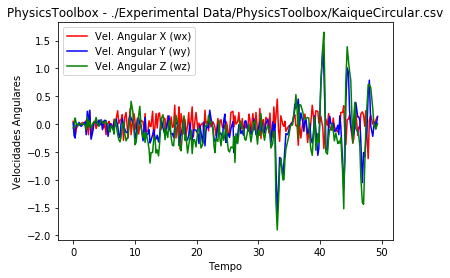

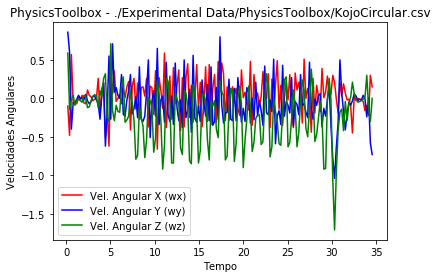

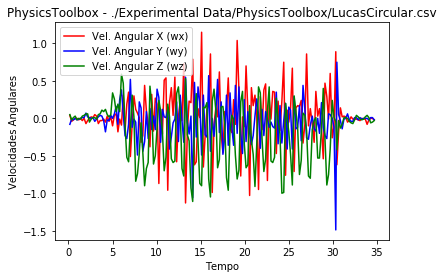

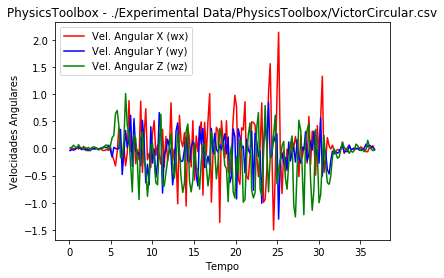

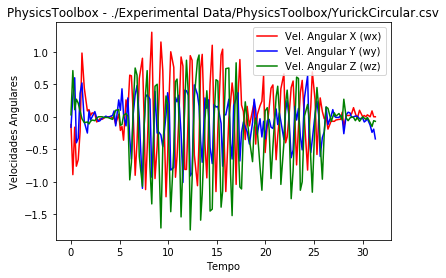

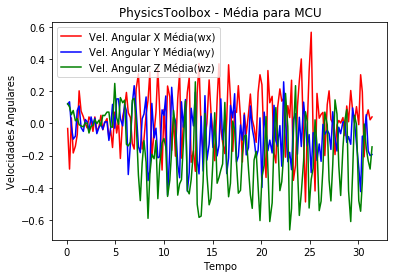

In [44]:
mcu_files = [
    './Experimental Data/PhysicsToolbox/KaiqueCircular.csv',
    './Experimental Data/PhysicsToolbox/KojoCircular.csv',
    './Experimental Data/PhysicsToolbox/LucasCircular.csv',
    './Experimental Data/PhysicsToolbox/VictorCircular.csv',
    './Experimental Data/PhysicsToolbox/YurickCircular.csv',
]

# guarda todos os wx, wy e wz de cada experimento
wx = []
wy = []
wz = []
time = []

# média x, y, z, time
avg = [[], [], [], []]

# substitui vírgulas por pontos para cada dado do PhysicsToolbox e transforma em float
def format_to_float(arr):
    return [float(s.replace(',', '.')) for s in arr]

def plot_physics_toolbox(file_list):
    for i in range(len(file_list)):
        data = pd.read_csv(mcu_files[i], delimiter=';')
        time.append(format_to_float(data['time'].tolist()))
        wx.append(format_to_float(data['wx'].tolist()))
        wy.append(format_to_float(data['wy'].tolist()))
        wz.append(format_to_float(data['wz'].tolist()))

        plt.plot(time[i], wx[i], color='red')
        plt.plot(time[i], wy[i], color='blue')
        plt.plot(time[i], wz[i], color='green')
        plt.title("PhysicsToolbox - %s" % (mcu_files[i]))
        plt.legend(["Vel. Angular X (wx)", "Vel. Angular Y (wy)", "Vel. Angular Z (wz)"])
        plt.xlabel("Tempo")
        plt.ylabel("Velocidades Angulares")
        plt.show()

# retorna o menor tamanho de todos os vetores de aceleração
def min_length():
    lengths = []
    for i in range(len(mcu_files)):
        lengths.append(len(wx[i]))

    return min(lengths)

def plot_average():
    min_l = min_length()
    
    # percorre as listas de acelerações e faz a média elemento a elemento
    for i in range(min_l):
        avg[0].append((wx[0][i]+wx[1][i]+wx[2][i]+wx[3][i]+wx[4][i])/5)
        avg[1].append((wy[0][i]+wy[1][i]+wy[2][i]+wy[3][i]+wy[4][i])/5)
        avg[2].append((wz[0][i]+wz[1][i]+wz[2][i]+wz[3][i]+wz[4][i])/5)
        avg[3].append((time[0][i]+time[1][i]+time[2][i]+time[3][i]+time[4][i])/5)
                      
    plt.plot(avg[3], avg[0], color='red')
    plt.plot(avg[3], avg[1], color='blue')
    plt.plot(avg[3], avg[2], color='green')
    plt.title("PhysicsToolbox - Média para MCU")
    plt.legend(["Vel. Angular X Média(wx)", "Vel. Angular Y Média(wy)", "Vel. Angular Z Média(wz)"])
    plt.xlabel("Tempo")
    plt.ylabel("Velocidades Angulares")
    plt.show()

    

plot_physics_toolbox(mcu_files)
plot_average()

In [10]:
dataset = pd.read_csv('./Experimental Data/UniformCircularMotion.csv')

phi = [radians(90), radians(180), radians(270), radians(360)]
delta_phi = radians(360)
time_plot = [i for i in range(20)]

In [11]:
# velocity
def omega(dp, dt):
    return dp/dt

# acceleration
def ac(do, dt):
    return do/dt

# phi(t), for Uniform Motion
def phiT(t, av):
    return (t*av)*radians(180)

In [3]:
# calculates average velocity, print it to StdOut and plot graphs for Uniform Motion
def calc_vel_and_plot(dataset, coord_x, coord_y, plot_color):
    subdataset = dataset.iloc[coord_x, coord_y[0]:coord_y[1]]
    timeline = [float(i) for i in subdataset]
    delta_t = np.sum(timeline)
    ang_velocity = omega(delta_phi, delta_t)
    print(("Angular Velocity: %s rad/s") % (ang_velocity))

    X = timeline
    Y = phi
            
    plt.plot(X, Y, '.', color=plot_color)

    positions_plot = [phiT(i, ang_velocity) for i in range(20)] # s[0] comes from constants 
    plt.plot(time_plot, positions_plot, color = plot_color)

In [4]:
def setup_and_save_plot(title, xlabel="Tempo (s)", ylabel="Espaco (rad)"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.clf()

Angular Velocity: 0.1261430497325755 rad/s


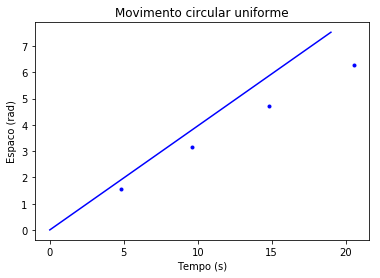

Angular Velocity: 0.1267793645516462 rad/s


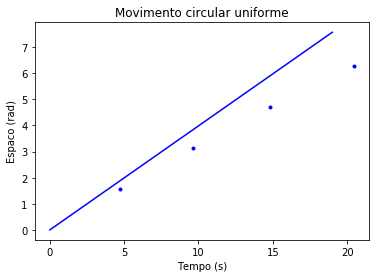

Angular Velocity: 0.09504137508969271 rad/s


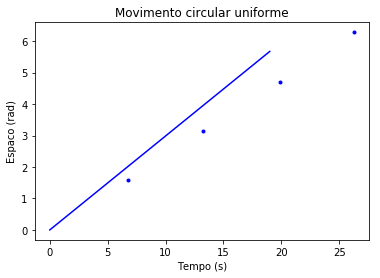

Angular Velocity: 0.09465479522717063 rad/s


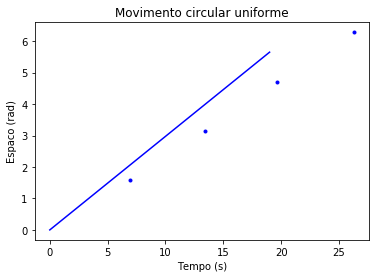

Angular Velocity: 0.10627850654904576 rad/s


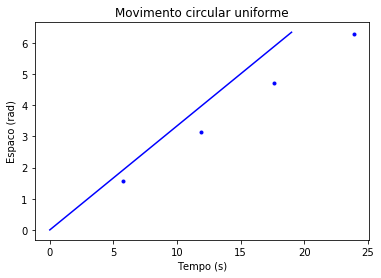

Angular Velocity: 0.10738652037565521 rad/s


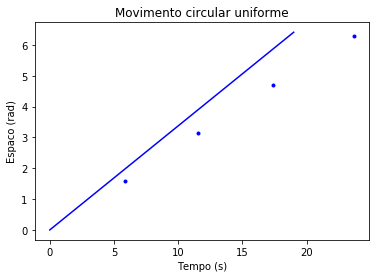

Angular Velocity: 0.10766253096606557 rad/s


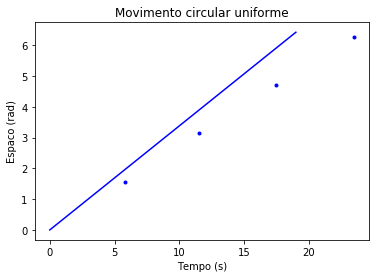

Angular Velocity: 0.10394020359271441 rad/s


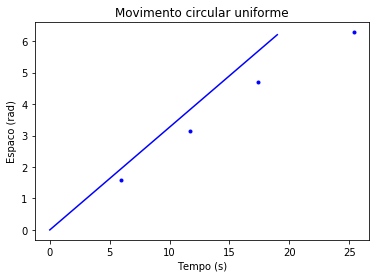

Angular Velocity: 0.10423333289946228 rad/s


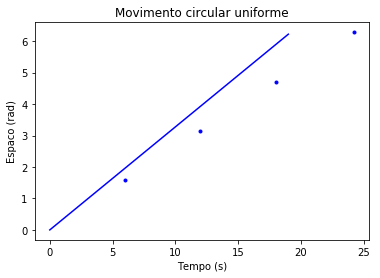

Angular Velocity: 0.10445860859816436 rad/s


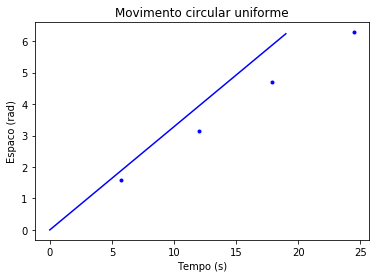

<Figure size 432x288 with 0 Axes>

In [15]:
for i in range(10):
    calc_vel_and_plot(dataset, (i), [2, 7], 'blue')
    setup_and_save_plot("Movimento circular uniforme")

### Dados

<p style='text-align: justify;'>Os dados coletados durante a execução do experimento apresentam-se como segue abaixo. Os tempos foram divididos pelos sensores de marcação em 90, 180, 270 e 360 graus. Cada coleta de dados foi dividida pela pessoa que realizou a caminhada.<br></p>
<p style='text-align: justify;'>Como houve dois sensores simultâneos,então a tabela divide cada um dos sensores com os tempos em segundos.<br></p>

|                                   |         |          |           |           |           | 
|-----------------------------------|---------|----------|-----------|-----------|-----------| 
| Movimento Circular Uniforme (MCU) |         | 90 graus | 180 graus | 270 graus | 360 graus | 
| Yurick                            | Crono 1 | 4.83     | 9.6       | 14.81     | 20.57     | 
|                                   | Crono 2 | 4.69     | 9.6       | 14.8      | 20.47     | 
| Kaique                            | Crono 1 | 6.73     | 13.22     | 19.87     | 16.29     | 
|                                   | Crono 2 | 6.96     | 13.44     | 19.67     | 26.31     | 
| Lucas                             | Crono 1 | 5.72     | 11.89     | 17.59     | 23.92     | 
|                                   | Crono 2 | 5.88     | 11.52     | 17.40     | 23.71     | 
| Kojo                              | Crono 1 | 5.84     | 11.53     | 17.49     | 23.50     | 
|                                   | Crono 2 | 5.93     | 11.70     | 17.40     | 25.42     | 
| Victor                            | Crono 1 | 6.02     | 12.00     | 18.02     | 24.24     | 
|                                   | Crono 2 | 5.75     | 12.02     | 17.88     | 24.50     | 


### Análise

<p style='text-align: justify;'>Diferentemente do EP1, neste experimento, percebe-se uma notável diferença entre os dados simulados e aqueles coletados. Os gráficos demonstram nitidamente que o algoritmo não conseguiu atingir a realidade do experimento executado. Diversos motivos podem ter influenciado em tais resultados: montagem incorreta do ambiente de experimento, uso de instrumentos que dificultaram certas medições, política de coleta de dados inapropriada, entre outros.<br></p>
<p style='text-align: justify;'>De qualquer forma, ainda torna-se um grande objeto de estudo, pois a análise da simulação pode trazer grandes resultados práticos e teóricos. O primeiro gráfico demonstra que diferentes pessoas realizando o experimento pode levar a uma certa divergência nos dados coletados, mesmo que todos os participantes tentem manter o mesmo deslocamento angular em certo intervalo de tempo durante a execução do experimento. Mesmo nos outros gráficos, percebe-se que a velocidade angular ainda varia de acordo com a pessoa.<br></p>
<p style='text-align: justify;'>A análise teórica a ser feita consiste em verificar que na grande maioria dos gráficos, os pontos simulados estão acima dos pontos experimentais, isso indica que a velocidade angular simulada é maior que a velocidade angular experimental. Isso pode ser facilmente visto ao analisar o eixo dos gráficos: deslocamento angular x tempo:
$$tg \theta = \frac{\Delta \phi}{\Delta tempo}$$<br>
Como o deslocamento angular é dado em radianos e o tempo em segundos, então:
$$tg \theta = \frac{[rad]}{[seg]} = rad/seg = \omega$$</p>
<p style='text-align: justify;'>Assim, para movimentos com maior velocidade angular, a inclinação da reta que representa o movimento também será maior.</p>

### Interpretação

<p style='text-align: justify;'>Antes de dar início à discussão sobre esse tipo de movimento, é preciso estabelecer alguns conceitos importantes. Para isso, novamente, utiliza-se uma imagem para tornar os conceitos mais legíveis.<br></p>
<img align="center" src="Images/MCU-Angle.GIF" width="450" height="450">
* Espaço Angular$(\phi)$: espaço do arco percorrido pelo corpo, partindo da origem (O).
* Deslocamento Angular $(\Delta \phi)$: variação angular correspondente ao movimento do corpo, partindo da origem (O).
* Velocidade Angular $(\omega)$: variação angular a cada certa variação no tempo, portanto possui a mesma ideia de velocidade em movimentos unidimensionais, porém a grandeza analisado corresponde à angulação.
* Período $(T)$: tempo utilizado para se completar uma volta inteira na circunferência.
* Aceleração Centrípeta $(a_{cp})$: aceleração, de módulo constante, responsável pela mudança de direção do vetor velocidade. Seu vetor possui direção e sentido apontando para o centro da circunferência, sendo o responsável pela trajetória circular e uniforme (módulo constante).
<p style='text-align: justify;'>Por conhecimentos físicos básicos, sabe-se que $a_{cp} = \frac{v^2}{R} = \frac{(\frac{2.\pi.R}{T})^2}{R} = \frac{(2.\pi)^2 . R}{T^2}$. Como todos os valores que compõem $a_{cp}$ são constantes, então conclui-se que a aceleração centrípeta possui valor constante. A partir dela, é possível calcular a velocidade angular e posição angular instantânea: <br></p>
$$\omega (t) = \int a_{cp}.dt = \int \frac{(2.\pi)^2 . R}{T^2} .dt = \frac{(2.\pi)^2 . R}{T^2}.\int 1.dt = \frac{(2.\pi)^2 . R}{T^2}.t + c$$
$$\phi (t) = \int \frac{(2.\pi)^2 . R}{T^2}.t.dt = \frac{(2.\pi)^2 . R}{T^2}.\int t.dt = \frac{(2.\pi)^2 . R}{T^2}.\frac{t^2}{2} + c$$

## Lançamento de Projétil

### Procedimento Experimental

<p style='text-align: justify;'>A realização do experimento se deu atrás do bloco A do IME. Primeiro foi providenciado uma espécie de estojo onde o celular com o acelerômetro seria fixado para que pudesse ser arremessado com mais segurança. Foi fixado um ponto onde um integrante se posicionaria para arremessar o estojo. Com uma trena, foram medidos 5 metros da posição do primeiro integrante e marcado o local onde o segundo integrante se posicionaria para receber o estojo. <br></p>
<p style='text-align: justify;'>Assim, para cada execução do experimento, um terceiro integrante observava o lançamento e marcava os tempos de arremesso e pouso do estojo.<br></p>

### Algoritmos de análises e auxiliares

Importando as bibliotecas necessárias e plotando os gráficos vindos do Physics Toolbox com dados dos experimentos.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import cos, sin, radians

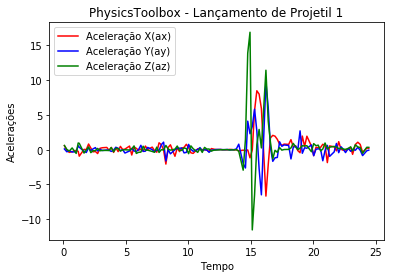

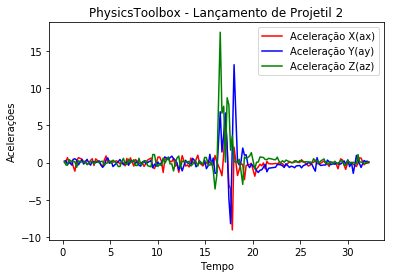

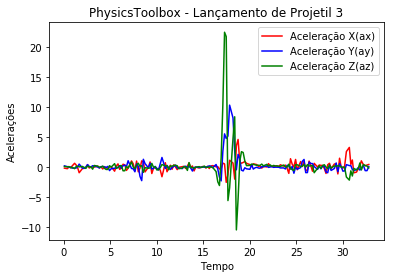

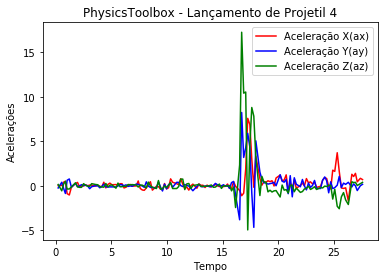

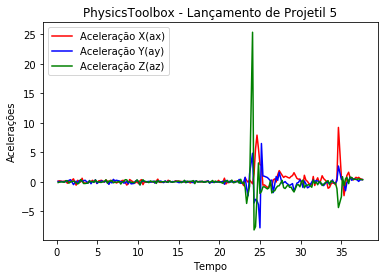

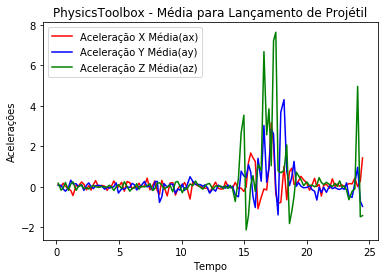

In [45]:
lancamento_files = [
    './Experimental Data/PhysicsToolbox/LancamentoProjetil1.csv',
    './Experimental Data/PhysicsToolbox/LancamentoProjetil2.csv',
    './Experimental Data/PhysicsToolbox/LancamentoProjetil3.csv',
    './Experimental Data/PhysicsToolbox/LancamentoProjetil4.csv',
    './Experimental Data/PhysicsToolbox/LancamentoProjetil5.csv',
]

# guarda todos os ax, ay e az de cada experimento
ax = []
ay = []
az = []
time = []

# média x, y, z, time
avg = [[], [], [], []]

# substitui vírgulas por pontos para cada dado do PhysicsToolbox e transforma em float
def format_to_float(arr):
    return [float(s.replace(',', '.')) for s in arr]

def plot_physics_toolbox(file_list):
    for i in range(len(file_list)):
        data = pd.read_csv(lancamento_files[i], delimiter=';')
        time.append(format_to_float(data['time'].tolist()))
        ax.append(format_to_float(data['ax'].tolist()))
        ay.append(format_to_float(data['ay'].tolist()))
        az.append(format_to_float(data['az'].tolist()))

        plt.plot(time[i], ax[i], color='red')
        plt.plot(time[i], ay[i], color='blue')
        plt.plot(time[i], az[i], color='green')
        plt.title("PhysicsToolbox - Lançamento de Projetil %s" % (i+1))
        plt.legend(["Aceleração X(ax)", "Aceleração Y(ay)", "Aceleração Z(az)"])
        plt.xlabel("Tempo")
        plt.ylabel("Acelerações")
        plt.show()

# retorna o menor tamanho de todos os vetores de aceleração
def min_length():
    lengths = []
    for i in range(len(lancamento_files)):
        lengths.append(len(ax[i]))

    return min(lengths)

def plot_average():
    min_l = min_length()
    
    # percorre as listas de acelerações e faz a média elemento a elemento
    # ignora o primeiro gráfico pois ele possui uma quantidade de dados muito maior
    for i in range(min_l):
        avg[0].append((ax[0][i]+ax[1][i]+ax[2][i]+ax[3][i]+ax[4][i])/5)
        avg[1].append((ay[0][i]+ay[1][i]+ay[2][i]+ay[3][i]+ay[4][i])/5)
        avg[2].append((az[0][i]+az[1][i]+az[2][i]+az[3][i]+az[4][i])/5)
        avg[3].append((time[0][i]+time[1][i]+time[2][i]+time[3][i]+time[4][i])/5)
                      
    plt.plot(avg[3], avg[0], color='red')
    plt.plot(avg[3], avg[1], color='blue')
    plt.plot(avg[3], avg[2], color='green')
    plt.title("PhysicsToolbox - Média para Lançamento de Projétil")
    plt.legend(["Aceleração X Média(ax)", "Aceleração Y Média(ay)", "Aceleração Z Média(az)"])
    plt.xlabel("Tempo")
    plt.ylabel("Acelerações")
    plt.show()


    

plot_physics_toolbox(lancamento_files)
plot_average()

Realizando a simulação, usando como parâmetro experimental o tempo de voo de cada lançamento

In [224]:
# Constantes utilizadas
dataset = pd.read_csv('./Experimental Data/ProjectileMotion.csv')

Theta = radians(55)
G = 9.8

Dado que apenas temos os dados do tempo de vôo do projétil, vamos calcular sua velocidade inicial (estimando o ângulo de lançamento Theta) e sua altura máxima a partir dos dados.

In [225]:
def calc_v0(Theta, t_voo):
    return ((G * t_voo)/(2*sin(Theta)))

def calc_max_height(v0, Theta):
    return (v0*v0*(sin(Theta)*sin(Theta))/(2*G))

Com as funções definidas acima, podemos analizar o movimento. Como trata-se de um movimento 2-D, vamos dividir sua análise nos eixos X e Y, sendo eles horizontal (MU) e vertical (MUV), respectivamente. 

In [226]:
# acceleration
def ac(dv, dt):
    return (dv/dt)

# s(t), for Uniform Motion
def sX(t = 0.0, vel = 0.0):
    return (t*vel)

# s(t), for Uniformly Accelerated Motion
def sY(t = 0.0, acc = 0.0):
    return ((calc_v0(Theta, 1.19)*sin(Theta)*t) + (((t*t)/2.0)*(-G*t)))

In [227]:
# calculates average velocity, print it to StdOut and plot graphs for Uniform Motion
def calc_vel_and_plot(delta_t, name, plot_color):
    velocity = calc_v0(Theta, delta_t) * cos(Theta)
    print(("Vel_X %s: %s m/s") % (name ,velocity))

    X = [0, 0.15, 0.30, 0.45, 1.0, 1.15, 1.30]

    positions_plot = []
    for i in X:
        positions_plot.append(sX(i, velocity))
    
    plt.plot(X, positions_plot, color = plot_color)
    
def calc_Y_and_plot(delta_t, name, plot_color):
    aceleration = G
    X = [0, 0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10,
         0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20,
         0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30,
         0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40,]
    
    positions_plot = []
    
    for i in X:
        positions_plot.append(sY(i, aceleration))
        
    plt.plot(X, positions_plot, color = plot_color)
    
def setup_and_save_plot(title, xlabel="Tempo (s)", ylabel="Espaço (m)"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.clf()

Vel_X Primeiro lançamento: 4.0829101553008185 m/s


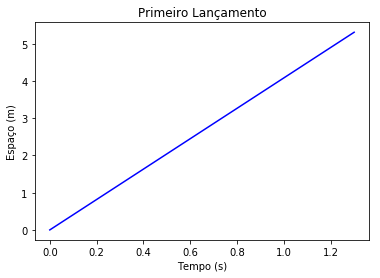

Vel_X Segundo lançamento: 3.6711881228335086 m/s


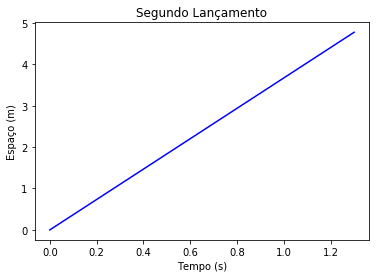

Vel_X Terceiro lançamento: 3.979979647183991 m/s


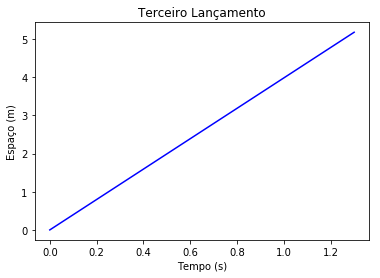

Vel_X Quarto lançamento: 3.568257614716682 m/s


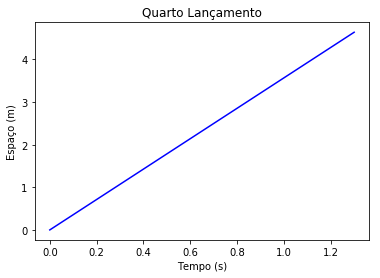

Vel_X Quinto lançamento: 3.602567784088958 m/s


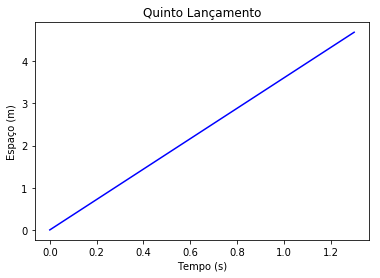

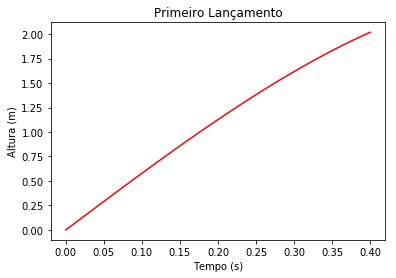

Altura máxima calculada =  1.7347225000000002 m


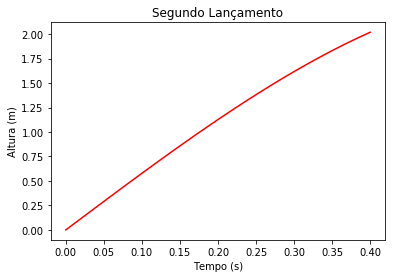

Altura máxima calculada =  1.4025024999999998 m


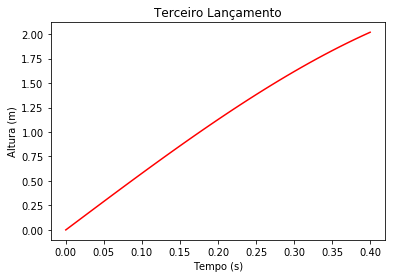

Altura máxima calculada =  1.6483599999999998 m


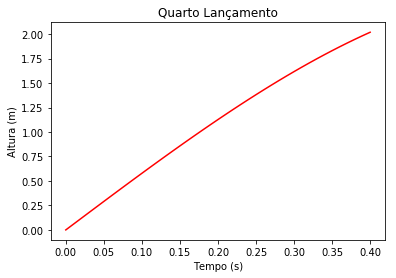

Altura máxima calculada =  1.3249600000000001 m


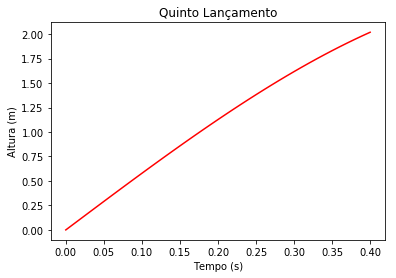

Altura máxima calculada =  1.3505625000000003 m


<Figure size 432x288 with 0 Axes>

In [228]:
calc_vel_and_plot(1.19, 'Primeiro lançamento', 'blue')
setup_and_save_plot('Primeiro Lançamento')

calc_vel_and_plot(1.07, 'Segundo lançamento', 'blue')
setup_and_save_plot('Segundo Lançamento')

calc_vel_and_plot(1.16, 'Terceiro lançamento', 'blue')
setup_and_save_plot('Terceiro Lançamento')

calc_vel_and_plot(1.04, 'Quarto lançamento', 'blue')
setup_and_save_plot('Quarto Lançamento')

calc_vel_and_plot(1.05, 'Quinto lançamento', 'blue')
setup_and_save_plot('Quinto Lançamento')

calc_Y_and_plot(1.19, 'Primeiro Lançamento', 'red')
setup_and_save_plot('Primeiro Lançamento', ylabel = "Altura (m)")
print("Altura máxima calculada = ", calc_max_height(calc_v0(Theta, 1.19), Theta), "m")

calc_Y_and_plot(1.07, 'Segundo lançamento', 'red')
setup_and_save_plot('Segundo Lançamento', ylabel = "Altura (m)")
print("Altura máxima calculada = ", calc_max_height(calc_v0(Theta, 1.07), Theta), "m")

calc_Y_and_plot(1.16, 'Terceiro lançamento', 'red')
setup_and_save_plot('Terceiro Lançamento', ylabel = "Altura (m)")
print("Altura máxima calculada = ", calc_max_height(calc_v0(Theta, 1.16), Theta), "m")

calc_Y_and_plot(1.04, 'Quarto lançamento', 'red')
setup_and_save_plot('Quarto Lançamento', ylabel = "Altura (m)")
print("Altura máxima calculada = ", calc_max_height(calc_v0(Theta, 1.04), Theta), "m")

calc_Y_and_plot(1.05, 'Quinto lançamento', 'red')
setup_and_save_plot('Quinto Lançamento', ylabel = "Altura (m)")
print("Altura máxima calculada = ", calc_max_height(calc_v0(Theta, 1.05), Theta), "m")

### Dados

<p style='text-align: justify;'>Os dados coletados durante a execução do experimento apresentam-se como segue abaixo.<br></p>
<p style='text-align: justify;'>Como todos os tempos de arremesso são considerados como o instante 0, a tabela contém apenas os tempos de pouso do projétil em segundos.<br></p>

|                        |                  |
|------------------------|------------------|
| Lançamento do projétil |  Tempo de voo  |
| Arremesso 1            |        1.19      | 
| Arremesso 2            |        1.07      |
| Arremesso 3            |        1.16      | 
| Arremesso 4            |        1.04      | 
| Arremesso 5            |        1.05      | 

### Análise

<p style='text-align: justify;'>Com a execução do script percebe-se que o experimento não ocorreu muito bem como esperado.</p>
<p style='text-align: justify;'>Comparando todos os gráficos é possível observar uma variação grande entre os dados gerados. Isso mostra que os experimentos não foram executados de maneira uniforme, o que gera divergências entre os valores e dificulta a análise do experimento como um todo, já que impossibilita uma comparação mais precisa e uma devida generalização.</p>
<p style='text-align: justify;'>Essas diferenças entre os gráficos se dá pela maior dificuldade de execução do experimento. Por ser um movimento mais dinâmico e muito mais dependente das forças aplicadas ao projétil, a sua reprodução de forma igual múltiplas vezes se torna mais difícil graças ao fator humano. Este que tem influência na aplicação das forças de lançamento e recepção e na medição dos tempos de arremesso e pouso.</p>
<p style='text-align: justify;'>Fora isso, é possível citar a semelhança entre todos os gráficos gerados que, mesmo com valores diferentes, seguem um padrão de curva muito parecido, o que nos permite concluir que apesar de não termos conseguido reproduzir o mesmo experimento fielmente, o movimento a ser estudado foi alcançado, que era um dos intuitos do experimento.</p>

### Intepretação

<p style='text-align: justify;'>Para estudar o movimento de um projétil lançado, é preciso utilizar o princípio da decomposição do movimento, considerando a resultante entre o movimento vertical <b>y</b> e o movimento horizontal <b>x</b>.<br></p>
<img align="center" src="Images/lancamento-projetil.GIF" width="450" height="450">
<ul>
    <li> Velocidade inicial $(\vec{v}_0)$;</li>
<li> Velocidade vertical inicial $(\vec{v}_{0y})$;</li>
<li> Velocidade horizontal inicial $(\vec{v}_{0x})$;</li>
<li> Ângulo em relação ao referencial $(\theta)$;</li>
<li> Posição inicial $(S_0)$ e posição final $(S)$;</li>
<li> Altura máxima atingida pelo objeto $(H)$;</li>
<li> Aceleração da gravidade $(g)$.</li>
</ul>
<p style='text-align: justify;'>Por conhecimentos de física, sabemos que a velocidade inicial pode ser expressa pela soma das componentes horizontal e vertical: $\vec{v}_0 = \vec{v}_{0x}i + \vec{v}_{0y}j$. Além disso, sabemos que a velocidade instântanea é dada pela soma vetorial das velocidades: $v = \sqrt{{\vec{v}_x}^2 + {\vec{v}_y}^2}$.<br>
Sabendo do ângulo inicial $\theta$, podemos achar as componentes horizontal e vertical iniciais: $\vec{v}_{0x} = \vec{v}_0 . \cos(\theta)$ e $\vec{v}_{0y} = \vec{v}_0 . \sin(\theta)$.
<p style='text-align: justify;'>Na direção vertical, o projétil realiza um movimento uniformemente variado com a aceleração da gravidade $a_y = -g$. Assim, a aceleração no eixo vertical pode ser integrada para se encontrar a velocidade no eixo vertical em qualquer instante $t$:<br>
<center>$\vec{v}_y = \vec{v}_0 . \sin(\theta) - gt$</center>
Ainda na direção vertical, podemos calcular a posição do projétil no eixo y em qualquer instante $t$:<br>
<center>$y = \vec{v}_0 . t . \sin(\theta) - \frac{1}{2} . gt^2$</center>
Com essas equações, é possível calcular a altura máxima atingida pelo projétil e o seu tempo de voo:<br>
<center>$H = \frac{{\vec{v}_0}^2 . \sin^2(\theta)}{2g}$ e $t = \frac{2 . \vec{v}_0 . \sin(\theta)}{g}$</center></p>
<p style='text-align: justify;'>Na direção horizontal, o projétil realiza um movimento retilíneo uniforme, portanto sua aceleração $a_x = 0$. Assim, a aceleração no eixo horizontal pode ser integrada para se encontrar a velocidade no eixo horizontal em qualquer instante $t$:<br>
<center>$\vec{v}_x = \vec{v}_0 . \cos(\theta)$</center>
Ainda na direção horizontal, podemos calcular a posição do projétil no eixo x em qualquer instante $t$:<br>
<center>$x = \vec{v}_0 . t . \cos(\theta)$</center>
Com essas equações, é possível calcular o alcance ou distância horizontal máximo atingido pelo projétil:<br>
<center>$S-S_0 = d = \frac{{\vec{v}_0}^2 . \sin(2\theta)}{g}$</center></p>

## Conclusão

<p style='text-align: justify'>Ao analisar os gráficos e os dados experimentais é possível verificar que, para a descida na rampa e para o movimento circular uniforme, o experimento e a simulação ficaram parecidos. Nos gráficos gerados, por exemplo, pode-se ver que as curvas que os pontos formam seguem o mesmo padrão que as curvas simuladas. Sendo assim, podemos concluir que os experimentos relacionados à descida na rampa e ao movimento circular uniforme foram bem executados.</p>

<p style='text-align: justify'>No entanto, ao analisarmos o experimento para o lançamento de projétil, é possível verificar uma divergência considerável entre os dados simulados e os experimentais.</p>

<p style='text-align: justify'>Após breve discussão, o grupo concordou que o erro no experimento relacionado ao lançamento de projétil foi o fator humano e a maior dificuldade de medir os dados com uma precisão mais aceitável. Da maneira que foi feita o experimento, seria preciso marcar o tempo certo em que o sensor passasse por uma marca, o que é dificultado com o sensor em movimento no ar. Além disso, reproduzir um mesmo lançamento, com a mesma angulação e força aplicadas ao projétil nos momentos de arremesso e recepção, é uma tarefa mais complicada do que apenas fazer uma descida na rampa ou um movimento durante uma trajetoria. Esses fatores acabaram criando as divergências apresentadas nos dados.</p>

<p style='text-align: justify'>Por fim, o grupo aprovou os resultados da descida na rampa e do movimento circular uniforme e concordou que há espaço para melhorias em relação ao lançamento de projétil. Além disso, o grupo chegou a conclusão de que a reprodução de movimentos bidimensionais é um trabalho mais árduo do que simular movimentos apenas de uma dimensão, já que há mais fatores que podem influenciar e afetar os resultados obtidos e dificultar as análises.</p>

## Log

* Realização dos experimentos: 2 dias
* Criação dos scripts: 5 dias
* Elaboração do relatório: 4 dias
* Edição do vídeo: 1 dia 

## Contribuição dos autores

<p style='text-align: justify;'>Victor Hugo e Ricardo Kojo escreveram e implementaram os scripts para análise e desenho dos gráficos. Todos os autores participaram nos experimentos e nas coletas de dados. Lucas Civile criou e editou o vídeo dos experimentos. Kaique Komata e Yurick Honda analisaram os dados obtidos e escreveram o texto desse manuscrito. Todos os autores leram, revisaram e aprovaram esse manuscrito.</p>

## Vídeo
<b>https://youtu.be/soXyQ9FWFTw</b>